In [1]:
import pandas as pd  
import numpy as np 


import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import *
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

sw = stopwords.words('english')

In [2]:
user_reviews = pd.read_csv("Data/train.csv")
user_reviews.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


# Data Preprocessing

In [3]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [4]:
user_reviews.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [5]:
len(user_reviews['variety'].unique())

28

In [6]:
user_reviews.shape

(82657, 12)

In [7]:
user_reviews['user_name']=user_reviews['user_name'].fillna(method='bfill')


In [8]:
user_reviews.isnull().sum()

user_name                 1
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [9]:
user_reviews.region_2.fillna(user_reviews.region_1, inplace=True)

In [10]:
user_reviews.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@wawinereport,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,South Eastern Australia,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,@vossroger,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,Barolo,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,Bergerac Sec,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,Vin de Liqueur,Château du Cèdre,Malbec


In [11]:
user_reviews.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [12]:
from sklearn.impute import SimpleImputer
user_reviews_price_array = np.array(user_reviews["price"])
imputer = SimpleImputer(strategy = "mean")
user_reviews["price"] = imputer.fit_transform(user_reviews_price_array.reshape(-1,1))

In [13]:
user_reviews.isnull().sum()

user_name                 1
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                     0
province                 35
region_1              12754
region_2              12754
winery                    0
variety                   0
dtype: int64

In [14]:
user_reviews['region_2']=user_reviews['region_2'].fillna(method='bfill')

In [15]:
user_reviews.isnull().sum()

user_name                 1
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                     0
province                 35
region_1              12754
region_2                  0
winery                    0
variety                   0
dtype: int64

In [16]:
del user_reviews['region_1']

In [17]:
user_reviews['designation'].value_counts()

Reserve                   1382
Estate                     898
Reserva                    743
Estate Grown               425
Riserva                    415
                          ... 
Family Estate                1
Champs Perdrix               1
Robert Thomas Vineyard       1
Brut Blanc de Noirs          1
Kaiton                       1
Name: designation, Length: 26424, dtype: int64

In [18]:
del user_reviews['designation']

In [19]:
user_reviews=user_reviews.dropna()

In [20]:
user_reviews.isnull().sum()

user_name             0
country               0
review_title          0
review_description    0
points                0
price                 0
province              0
region_2              0
winery                0
variety               0
dtype: int64

In [21]:
user_reviews.country.nunique()

38

In [22]:
user_reviews.variety.nunique()

28

# Lets view the average points to each variety of wine

In [23]:
user_reviews.groupby("variety")["points"].mean().sort_values(ascending = False)

variety
Nebbiolo                      90.283675
Grüner Veltliner              90.051185
Champagne Blend               89.723742
Riesling                      89.466602
Pinot Noir                    89.417423
Syrah                         89.278347
Rhône-style Red Blend         89.171743
Bordeaux-style Red Blend      89.102601
Portuguese Red                88.780599
Bordeaux-style White Blend    88.692941
Cabernet Sauvignon            88.580474
Gewürztraminer                88.578069
Sangiovese                    88.532564
Pinot Gris                    88.503057
Red Blend                     88.408354
Chardonnay                    88.325532
Cabernet Franc                88.188300
Sparkling Blend               88.062105
Gamay                         88.058824
Malbec                        87.990562
Zinfandel                     87.849253
Tempranillo                   87.536282
Sauvignon Blanc               87.459945
White Blend                   87.379894
Merlot                        87

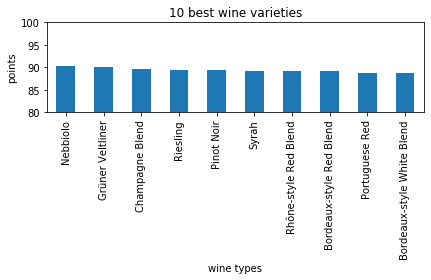

In [24]:
s = user_reviews.groupby("variety")["points"].mean().sort_values(ascending = False).head(10)
s.plot.bar()
plt.xlabel("wine types")
plt.ylabel("points")
plt.title("10 best wine varieties")
plt.tight_layout()
plt.ylim(80,100)  
plt.show()

###### Average Wine ratings appear to be more in the range of 88. 

# Variety of wine that has received 100 points

In [25]:
user_reviews[user_reviews.points ==100]["variety"].value_counts()

Bordeaux-style Red Blend      4
Merlot                        1
Cabernet Sauvignon            1
Bordeaux-style White Blend    1
Syrah                         1
Sangiovese                    1
Chardonnay                    1
Champagne Blend               1
Portuguese Red                1
Name: variety, dtype: int64

###### Except Merlot, Sangiovese,Chardonnay,Cabernet Sauvignon are in the 10 best rated wines.

In [26]:
df = (user_reviews.groupby('variety').variety.agg([len]).sort_values(by='len', ascending=False).reset_index().head(10))
df.head(10)


,variety,len
0,Pinot Noir,10584
1,Chardonnay,9400
2,Cabernet Sauvignon,7549
3,Red Blend,7158
4,Bordeaux-style Red Blend,5497
5,Riesling,4147
6,Sauvignon Blanc,4007
7,Syrah,3316
8,Rosé,2830
9,Merlot,2470


###### Pinot Noir is the variety with the most reviews(10584) with average points 89.417423. Bordeaux-style Red Blend ranks 5th in the number of top reviewed wines but has received a great 100 points for four times.

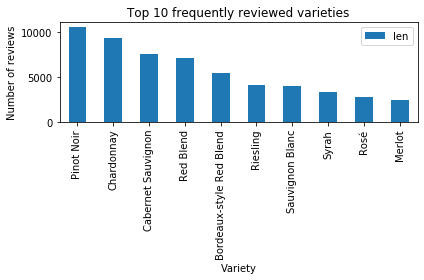

In [27]:
###### plt.figure(figsize=(25,10))
df.plot.bar(x='variety',y='len')
plt.xlabel("Variety")
plt.ylabel("Number of reviews")
plt.title("Top 10 frequently reviewed varieties")
plt.tight_layout()
plt.show()

# Average Price per bottle of wine for each variety

In [28]:
average_price_per_variety=user_reviews.groupby("variety")["price"].mean().sort_values(ascending = False)

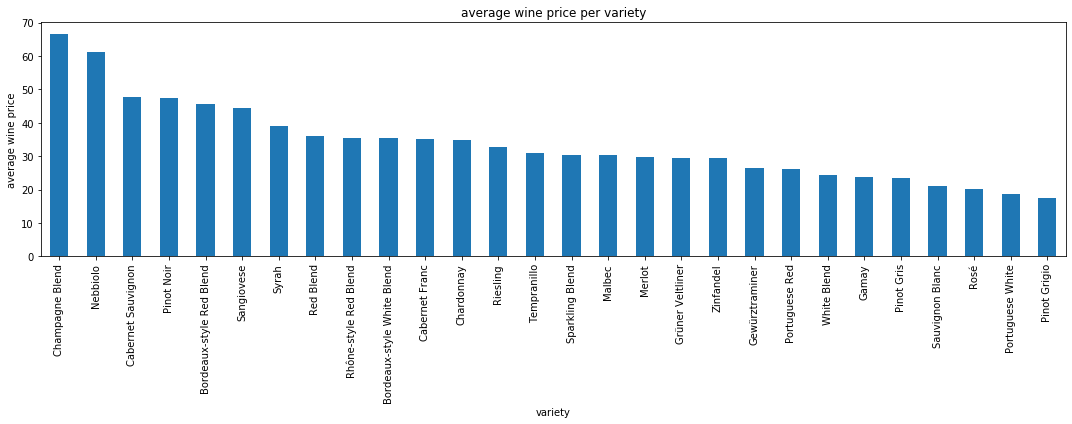

In [29]:
plt.figure(figsize=(15,6))
average_price_per_variety.plot.bar()
plt.xlabel("variety")
plt.ylabel("average wine price")
plt.title("average wine price per variety")
plt.tight_layout()
plt.show()

###### Most of the top priced wines are highly rated and highly reviewed

In [30]:
average_price_per_country=user_reviews.groupby("country")["price"].mean().sort_values(ascending = False)

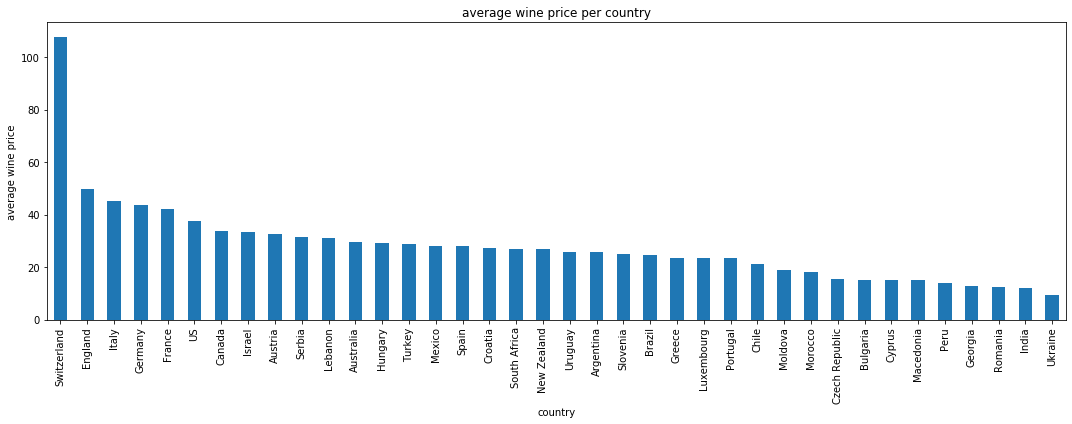

In [31]:
plt.figure(figsize=(15,6))
average_price_per_country.plot.bar()
plt.xlabel("country")
plt.ylabel("average wine price")
plt.title("average wine price per country")
plt.tight_layout()
plt.show()

In [32]:
user_reviews[user_reviews['country']=='Switzerland']['variety']

19311     Pinot Noir
24147     Pinot Noir
31723         Merlot
34801     Pinot Noir
72918    White Blend
Name: variety, dtype: object

###### Wines from Switzerland have the highest average price with Pinot Noir variety as one of it. Though it has never receieved a complete 100 points, Pinot Noir is the  most frequesntly reviewed and has received more than average ratings.

# Number of reviews per country

In [33]:
user_reviews.country.value_counts()


US                38572
France            15948
Italy              9112
Portugal           3197
Chile              2891
Spain              2755
Argentina          2570
Austria            1892
Germany            1573
New Zealand        1121
Australia          1028
South Africa        727
Israel              320
Canada              176
Greece              139
Bulgaria             93
Romania              80
England              62
Slovenia             42
Mexico               38
Moldova              35
Hungary              35
Uruguay              33
Turkey               33
Brazil               28
Lebanon              28
Morocco              21
Georgia              12
Croatia              12
Ukraine              11
Peru                  8
Cyprus                6
Macedonia             5
Luxembourg            5
Switzerland           5
Serbia                4
Czech Republic        3
India                 1
Name: country, dtype: int64

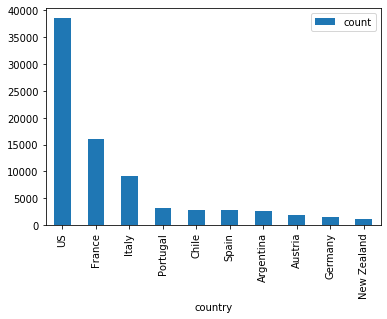

In [34]:
df = pd.DataFrame(user_reviews['country'].value_counts().head(10)).reset_index()
df.columns = ['country', 'count']
df.plot.bar(x='country',y='count')

In [35]:
user_reviews.groupby("user_name").points.agg(["min","max","mean","count"])
user_reviews

,user_name,country,review_title,review_description,points,price,province,region_2,winery,variety
0,@wawinereport,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,Australia Other,South Eastern Australia,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15.0,Washington,Columbia Valley,North by Northwest,Red Blend
2,@vossroger,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,Piedmont,Barolo,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22.0,Southwest France,Bergerac Sec,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33.0,France Other,Vin de Liqueur,Château du Cèdre,Malbec
...,...,...,...,...,...,...,...,...,...,...
82651,@wineschach,US,La Crema 2012 Chardonnay (Arroyo Seco),"Made in a drier, tarter style than the winery'...",90,30.0,California,Central Coast,La Crema,Chardonnay
82652,@wineschach,Spain,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",84,12.0,Northern Spain,Rioja,Montecillo,Tempranillo
82653,@vossroger,US,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",85,21.0,New Mexico,New Mexico,Vivác Winery,Cabernet Sauvignon
82654,@vossroger,France,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,87,14.0,Beaujolais,Beaujolais-Villages,Domaine de la Madone,Gamay


###### US has the highest number of reviewers. @vossroger has reviewed most of the wines.

In [36]:
df=user_reviews[user_reviews.user_name=="@vossroger"]
df.sort_values(by='price',ascending=False)

,user_name,country,review_title,review_description,points,price,province,region_2,winery,variety
60131,@vossroger,France,Château les Ormes Sorbet 2013 Médoc,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Médoc,Château les Ormes Sorbet,Bordeaux-style Red Blend
63394,@vossroger,France,Château Pétrus 2014 Pomerol,The wine is a velvet glove in an iron fist. Th...,96,2500.0,Bordeaux,Pomerol,Château Pétrus,Bordeaux-style Red Blend
51441,@vossroger,France,Château Pétrus 2011 Pomerol,This extravagantly perfumed wine has great jui...,97,2000.0,Bordeaux,Pomerol,Château Pétrus,Bordeaux-style Red Blend
9133,@vossroger,France,Domaine du Comte Liger-Belair 2005 La Romanée,"A wonderfully complete wine, with all the elem...",96,2000.0,Burgundy,La Romanée,Domaine du Comte Liger-Belair,Pinot Noir
7769,@vossroger,France,Château Margaux 2009 Margaux,"A massive wine for Margaux, packed with tannin...",98,1900.0,Bordeaux,Margaux,Château Margaux,Bordeaux-style Red Blend
...,...,...,...,...,...,...,...,...,...,...
36111,@vossroger,Portugal,Adega Cooperativa da Batalha NV D'Ó Red (Portu...,The wine—perhaps named in honor of Homer Simps...,84,5.0,Portuguese Table Wine,Napa,Adega Cooperativa da Batalha,Portuguese Red
11689,@vossroger,Portugal,Lagosta 2008 White (Vinho Verde),"A sweet, soft, clean wine, anonymous almost. Y...",82,5.0,Vinho Verde,Barbaresco,Lagosta,Portuguese White
57263,@vossroger,France,Belle Made For You NV White (Vin de France),This blend of Sauvignon Blanc and Grenache Bla...,84,5.0,France Other,Vin de France,Belle Made For You,White Blend
74909,@vossroger,Portugal,Herdade dos Machados 2011 Toutalga Tinto Red (...,This is a full-bodied and very ripe wine. It i...,85,5.0,Alentejano,La Mancha,Herdade dos Machados,Portuguese Red


In [37]:
df=df.loc[:,['country','winery']]
df['country'].value_counts()

France          13728
US               3957
Portugal         3189
Italy             946
Austria           599
Germany           366
Australia          47
South Africa       29
New Zealand        24
Chile              19
Spain              12
Romania             8
Lebanon             5
Slovenia            3
Mexico              3
Turkey              2
Macedonia           1
Bulgaria            1
Argentina           1
Hungary             1
Israel              1
Name: country, dtype: int64

###### It is observed that the France Bordeaux is the most expensive wine. Also France wineries being the top reviewed ones has also been rated many times by the frequest reviewer.

# Relation between price and points given to variety of wines

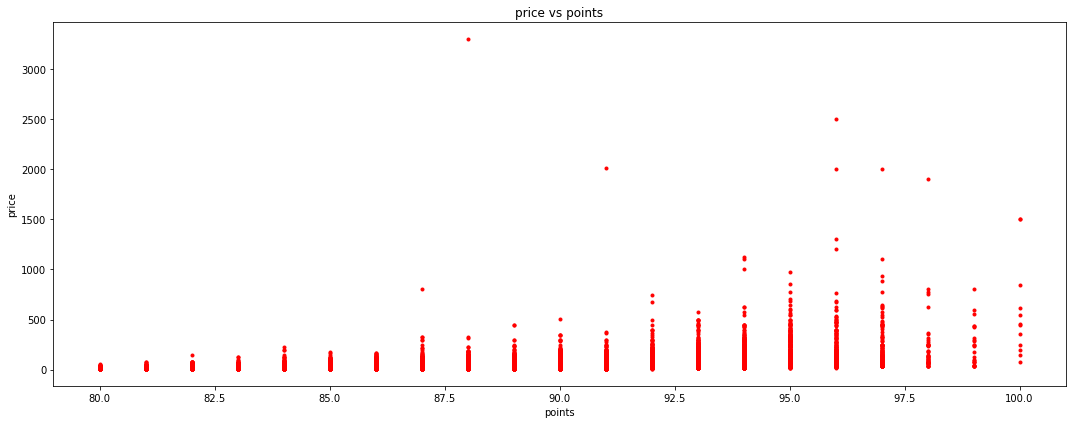

In [38]:
plt.figure(figsize=(15,6))
plt.scatter(x = user_reviews.points , y = user_reviews.price, c = "r", marker = ".")
plt.xlabel("points")
plt.ylabel("price")
plt.title("price vs points")
plt.tight_layout()
plt.show()

In [39]:
user_reviews["price"].corr(user_reviews["points"])

0.3978862666559235

###### It appears that the average price of wine is higher as the rating increases. We could say that wines that get good reviews tend to get higher price

In [40]:
user_reviews['year'] = user_reviews.review_title.str.extract('((19|20)\d{2})')[0]


df = (user_reviews.loc[user_reviews.year.notnull()].assign(year=user_reviews.year.astype('float64')))
df.head(5)

,user_name,country,review_title,review_description,points,price,province,region_2,winery,variety,year
0,@wawinereport,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,Australia Other,South Eastern Australia,Andrew Peace,Chardonnay,2007.0
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15.0,Washington,Columbia Valley,North by Northwest,Red Blend,2014.0
2,@vossroger,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,Piedmont,Barolo,Renato Ratti,Nebbiolo,2007.0
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22.0,Southwest France,Bergerac Sec,Domaine l'Ancienne Cure,Bordeaux-style White Blend,2010.0
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33.0,France Other,Vin de Liqueur,Château du Cèdre,Malbec,2012.0


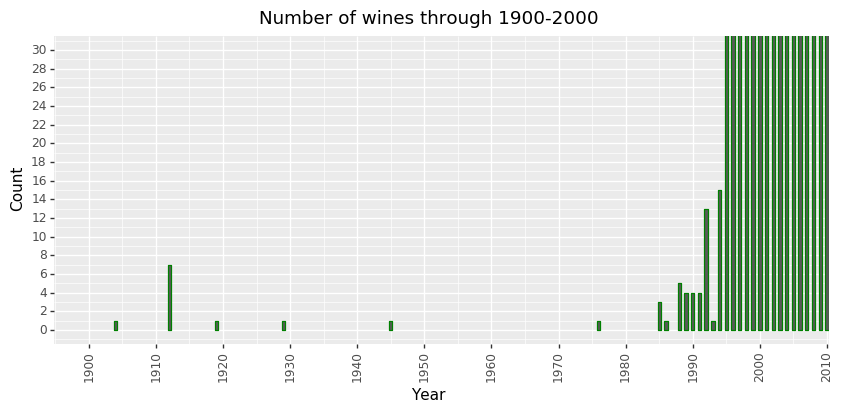

<ggplot: (-9223371860895763156)>

In [41]:
(ggplot(df)
 + aes('year')
 + geom_bar(width=0.5,color='green')
 + ggtitle("Number of wines through 1900-2000")
 + xlab('Year')
 + ylab('Count')
 + theme(axis_text_x=element_text(rotation=90),
         figure_size=(10, 4))
 + scale_x_continuous(breaks=range(1900, 2020, 10))
 + scale_y_continuous(breaks=range(0, 31, 2))
 + coord_cartesian(xlim=(1900, 2005), ylim=(0, 30))
)

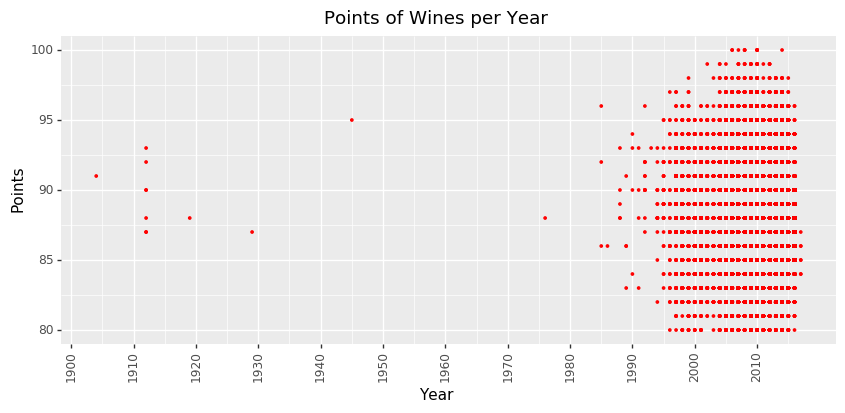

<ggplot: (-9223371861023367120)>

In [42]:
(ggplot(df)
 + aes(x='year', y='points')
 + geom_point(size=0.5,color='red')
 + ggtitle("Points of Wines per Year")
 + xlab('Year')
 + ylab('Points')
 + theme(axis_text_x=element_text(rotation=90),
         figure_size=(10, 4))
 + scale_x_continuous(breaks=range(1900, 2020, 10))
)

###### It can be seen that the vintage wines are higly rated and number of reviews increased in the last few years of 19th century.

# Model Building

In [43]:
user_reviews[user_reviews.duplicated('review_description',keep=False)].sort_values('review_description')

,user_name,country,review_title,review_description,points,price,province,region_2,winery,variety,year
53655,@wawinereport,US,Roza Ridge 2010 Malbec (Rattlesnake Hills),"100% Malbec, it's redolent with dark plums, wi...",87,20.000000,Washington,Columbia Valley,Roza Ridge,Malbec,2010
73628,@wawinereport,US,Roza Ridge 2010 Malbec (Rattlesnake Hills),"100% Malbec, it's redolent with dark plums, wi...",87,20.000000,Washington,Columbia Valley,Roza Ridge,Malbec,2010
64962,@wawinereport,US,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,"100% Sangiovese, this pale pink wine has notes...",88,18.000000,Washington,Columbia Valley,Ross Andrew,Rosé,2013
81272,@wawinereport,US,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,"100% Sangiovese, this pale pink wine has notes...",88,18.000000,Washington,Columbia Valley,Ross Andrew,Rosé,2013
32203,@vossroger,France,Château Haut-Sarpe 2008 Barrel sample (Saint-...,87-89 Barrel sample. Minty aromas give lifted ...,88,36.922232,Bordeaux,Saint-Émilion,Château Haut-Sarpe,Bordeaux-style Red Blend,2008
...,...,...,...,...,...,...,...,...,...,...,...
48067,@gordone_cellars,US,Eye Candy 2012 Chardonnay (California),lean and zesty Chardonnay with a burst of mout...,84,7.000000,California,California Other,Eye Candy,Chardonnay,2012
43796,@JoeCz,New Zealand,Tussock Jumper 2016 Sauvignon Blanc (New Zealand),this medium-bodied Sauvignon Blanc shows only ...,88,15.000000,New Zealand,Napa,Tussock Jumper,Sauvignon Blanc,2016
58807,@JoeCz,New Zealand,Tussock Jumper 2016 Sauvignon Blanc (New Zealand),this medium-bodied Sauvignon Blanc shows only ...,88,15.000000,New Zealand,Rosso di Montepulciano,Tussock Jumper,Sauvignon Blanc,2016
4688,@paulgwine,Canada,Quails' Gate 2012 Chardonnay (Okanagan Valley),"“Open and drink” the instructions should read,...",89,20.000000,British Columbia,Okanagan Valley,Quails' Gate,Chardonnay,2012


In [44]:
input_data = user_reviews['review_description']
output_data = user_reviews['variety']

In [45]:
labelEncoder = LabelEncoder()
output_data = labelEncoder.fit_transform(output_data)
output_data

array([ 5, 17, 11, ...,  3,  6,  0])

In [46]:
list_aux=[]
for phase_word in input_data:
    list_aux.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
input_data = list_aux

In [47]:
type(input_data)

list

In [48]:
import pickle
countVectorizer = CountVectorizer(decode_error="replace")
input_data = countVectorizer.fit_transform(input_data)
pickle.dump(countVectorizer.vocabulary_,open("feature.pkl","wb"))

In [49]:
input_data.shape

(82621, 35465)

In [50]:

X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2) 


In [51]:
import warnings

warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegression
cl= LogisticRegression()
cl.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred = cl.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

 
print(accuracy_score(y_test, y_pred))

0.6954916792738275


In [54]:
u_data = pd.read_csv("Data/test.csv")
u_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [55]:
u_data.isnull().sum()

user_name              4738
country                   4
review_title              0
review_description        0
designation            5989
points                    0
price                  1394
province                  4
region_1               3314
region_2              11751
winery                    0
dtype: int64

In [56]:
test_data=u_data['review_description']

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
loaded_vec = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("feature.pkl", "rb")))
tfidf = transformer.fit_transform(loaded_vec.fit_transform(test_data))

In [58]:
y_pred_test_data=cl.predict(tfidf)

In [60]:
predictions_test = labelEncoder.inverse_transform(y_pred_test_data)

In [61]:
(predictions_test)

array(['Cabernet Sauvignon', 'Cabernet Sauvignon', 'Chardonnay', ...,
       'Cabernet Sauvignon', 'Chardonnay', 'Cabernet Sauvignon'],
      dtype=object)

In [62]:
u_data['variety']=predictions_test

In [63]:
u_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Cabernet Sauvignon
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Cabernet Sauvignon
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Cabernet Sauvignon
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese


In [65]:
u_data.to_csv('Submission.csv')